In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor



In [3]:
df=pd.read_csv('data/Studentsperformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
x=df.drop(columns='math score',axis=1)
y=df['math score']

In [5]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
num_feature=x.select_dtypes(exclude='object').columns
cat_feature=x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScaler",numeric_transformer,num_feature),
    ]
)

In [17]:
cat_feature

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [7]:
x=preprocessor.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train.shape,x_test.shape,

((800, 19), (200, 19))

In [9]:
def evaluate_model(true,predicated):
    mae=mean_absolute_error(true,predicated)
    mse=mean_squared_error(true,predicated)
    r2_square=r2_score(true,predicated)
    rmse=np.sqrt(mean_absolute_error(true,predicated))
    return mae,mse,r2_square,rmse

In [10]:
models={
    "Linear Regressor":LinearRegression(),
    "Lasso":Lasso(),
    "ridge":Ridge(),
    'k-neightbour Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Adaboost Regressor':AdaBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    # make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_mse,model_train_rscore,model_train_rmsescore=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rscore,model_test_rmsescore=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training data")
    print("mean absolute error {:.4f}".format(model_train_mae))
    print("mean squared error {:.4f}".format(model_train_mse))
    print("r2score  error {:.4f}".format(model_train_rscore))
    print("root mean squared error  error {:.4f}".format(model_train_rmsescore))


    print("----------------------------")

    print("model performance for trainin")
    print("mean absolute error {:.4f}".format(model_test_mae))
    print("mean squared error {:.4f}".format(model_test_mse))
    print("r2score  error {:.4f}".format(model_test_rscore))
    print("root mean absolute error {:.4f}".format(model_test_rmsescore))
    r2_list.append(model_test_rscore)

    print('-----------------------------')
    print('-----------------------------')


Linear Regressor
model performance for training data
mean absolute error 4.2667
mean squared error 28.3349
r2score  error 0.8743
root mean squared error  error 2.0656
----------------------------
model performance for trainin
mean absolute error 4.2148
mean squared error 29.0952
r2score  error 0.8804
root mean absolute error 2.0530
-----------------------------
-----------------------------
Lasso
model performance for training data
mean absolute error 5.2063
mean squared error 43.4784
r2score  error 0.8071
root mean squared error  error 2.2817
----------------------------
model performance for trainin
mean absolute error 5.1579
mean squared error 42.5064
r2score  error 0.8253
root mean absolute error 2.2711
-----------------------------
-----------------------------
ridge
model performance for training data
mean absolute error 4.2650
mean squared error 28.3378
r2score  error 0.8743
root mean squared error  error 2.0652
----------------------------
model performance for trainin
mean abs

In [11]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,ridge,0.880593
0,Linear Regressor,0.880433
5,Random Forest Regressor,0.854137
6,Adaboost Regressor,0.850903
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,k-neightbour Regressor,0.783497
4,Decision Tree,0.742766


I choose Linear Regression

In [12]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model ",score)

Accuracy of model  88.04332983749565


plot y_pred and y_test

Text(0, 0.5, 'Predicated Data')

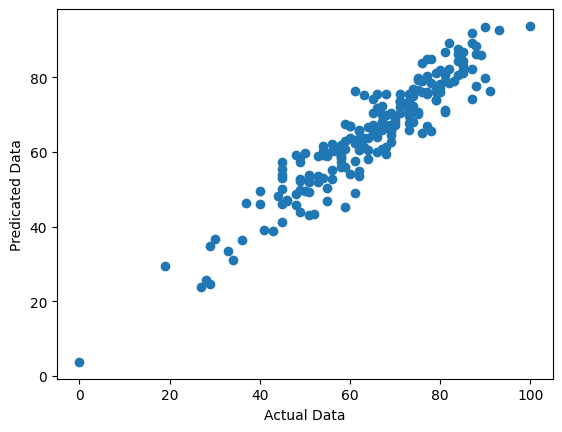

In [13]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicated Data")

<Axes: xlabel='math score'>

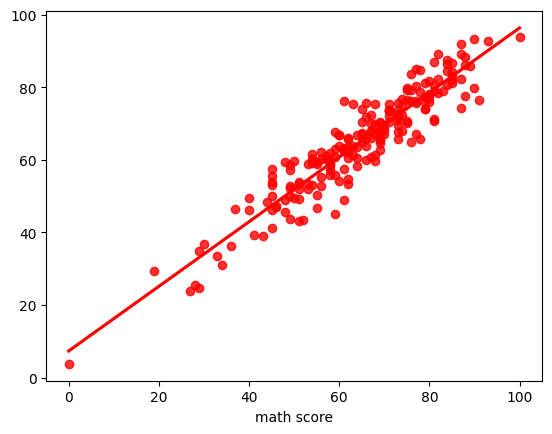

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [15]:
pred_df=pd.DataFrame({"Actual":y_test,"Predicated":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual,Predicated,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
